# Data Science Challenge

In [1]:
## Feel free to add other libraries you are going to use in the notebook whic hare not present here.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
import collections
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler 
from sklearn.impute import KNNImputer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.utils.class_weight import compute_class_weight
import missingno as msno

ModuleNotFoundError: No module named 'imblearn'

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every restaurant.
`name` | The name of the restaurant.
`location` | The location of the restaurant.
`phone` | The phone number of the restaurant.
`table_bookings` | Indicates if the restaurant takes online reservations.
`online_ordering` | Indicates if the restaurant takes online orders.
`restaurant_type` | The type of restaurant. Values are Casual Dining, Cafe, Quick Bites, etc.
`restaurant_operation` | The primary operation of the restaurant. For example, ‘Delivery’.
`primary_cuisine` | The name of the primary cuisine offered by the restaurant. Values are American, Mexican, etc.
`popular_dishes` | The number of popular dishes offered by the restaurant.
`cuisines_offered` | The number of cuisines offered by the restaurant.
`rating` | The rating of the restaurant.
`votes` | The number of customer votes received by the restaurant
`dining_cost` (Target Variable)| It indicates if the classification of dining costs at the restaurant. Values are 0 (Budget), 1 (Expensive).

### You will use the train.csv file to train and generate prediction on test.csv file

## Data Wrangling

In [ ]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [5]:
data.head() # Overview of the dataset

,id,name,table_bookings,online_ordering,location,rating,votes,phone,restaurant_type,restaurant_operation,popular_dishes,cuisines_offered,primary_cuisine,dining_cost
0,19340,Plan B,No,No,Greenwich,4.2/5,1651.0,8041609100,Casual Dining,Pubs and bars,7.0,4.0,American,1.0
1,31103,Hunan,No,Yes,Tribeca,4.3 /5,2248.0,080 25520154,Casual Dining,Dine-out,7.0,3.0,Chinese,1.0
2,17563,Lavonne,No,No,Greenwich,4.4/5,1095.0,9740954505,Cafe,Cafes,7.0,2.0,Snacks,1.0
3,11192,Ambur Star Dum Burger,Yes,No,Chelsea,3.4/5,17.0,"7200110202\r, 9840017416",Quick Bites,Dine-out,1.0,1.0,Italian,0.0
4,21324,Dadi's Dum Burger,Yes,Yes,Lower Manhattan,4.1 /5,2727.0,"7090999991, 7090599999",Casual Dining,Dine-out,7.0,3.0,Italian,1.0


In [6]:
data.isna().sum() # missing value

id                        0
name                      0
table_bookings            0
online_ordering           0
location                  0
rating                  351
votes                    44
phone                    34
restaurant_type         112
restaurant_operation     20
popular_dishes          119
cuisines_offered         22
primary_cuisine          17
dining_cost               0
dtype: int64

In [7]:
#Explore columns
data.columns

Index(['id', 'name', 'table_bookings', 'online_ordering', 'location', 'rating',
       'votes', 'phone', 'restaurant_type', 'restaurant_operation',
       'popular_dishes', 'cuisines_offered', 'primary_cuisine', 'dining_cost'],
      dtype='object')

In [8]:
#Describe the dataset
#Detailed information to show the distribution
data.describe()

,id,votes,popular_dishes,cuisines_offered,dining_cost
count,2435.000000,2391.000000,2316.000000,2413.00000,2435.000000
mean,24562.075975,486.398996,3.569948,2.58765,0.520329
std,14043.041772,1294.380994,2.816004,1.29975,0.499689
min,53.000000,0.000000,1.000000,1.00000,0.000000
25%,11191.000000,9.500000,1.000000,2.00000,0.000000
50%,22754.000000,66.000000,1.500000,2.00000,1.000000
75%,34879.000000,383.000000,7.000000,3.00000,1.000000
max,51708.000000,14723.000000,7.000000,8.00000,1.000000


In [9]:
### Perform some statistical analysis

# overview information for the dataframe 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    2435 non-null   int64  
 1   name                  2435 non-null   object 
 2   table_bookings        2435 non-null   object 
 3   online_ordering       2435 non-null   object 
 4   location              2435 non-null   object 
 5   rating                2084 non-null   object 
 6   votes                 2391 non-null   float64
 7   phone                 2401 non-null   object 
 8   restaurant_type       2323 non-null   object 
 9   restaurant_operation  2415 non-null   object 
 10  popular_dishes        2316 non-null   float64
 11  cuisines_offered      2413 non-null   float64
 12  primary_cuisine       2418 non-null   object 
 13  dining_cost           2435 non-null   float64
dtypes: float64(4), int64(1), object(9)
memory usage: 266.5+ KB


In [10]:
### See if null values exists for it
data.isnull().sum()

id                        0
name                      0
table_bookings            0
online_ordering           0
location                  0
rating                  351
votes                    44
phone                    34
restaurant_type         112
restaurant_operation     20
popular_dishes          119
cuisines_offered         22
primary_cuisine          17
dining_cost               0
dtype: int64

In [11]:
### Feel free to explore and do anything you feel relevant

## Exploratory Data Analysis

1. Explore the shape and see what type of problem you are solving.
2. Define the problem and shape of the dataet. 
3. Look for outliers if any and see its distribution across the columns, along the columns.
4. What type of null you have (Categorical or Numerical).
5. How would fix the null values.

In [ ]:
# Check for the shape of dataset

data.shape    #2435 rows, 14 columns

(2435, 14)

In [ ]:
# Check the distribution of the target variable: dining_cost
data.dining_cost.value_counts()

1.0    1267
0.0    1168
Name: dining_cost, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribution of Target Variable')

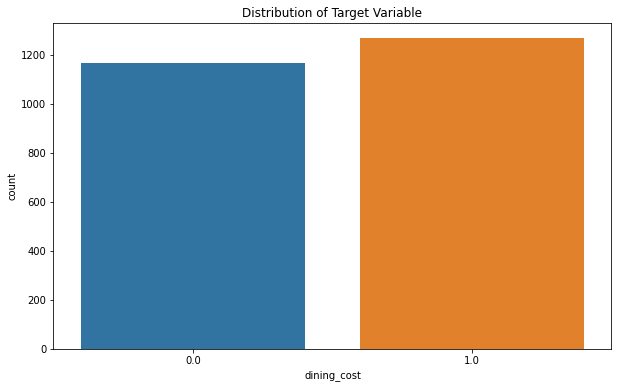

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot('dining_cost', data=data).set_title('Distribution of Target Variable')
#histogram
#much the same

In [ ]:
# understand Numerical feature
# discrete/continuous
# 'votes', 'popular_dishes', 'cuisines_offered'
data[['votes', 'popular_dishes', 'cuisines_offered']].describe()

,votes,popular_dishes,cuisines_offered
count,2391.000000,2316.000000,2413.00000
mean,486.398996,3.569948,2.58765
std,1294.380994,2.816004,1.29975
min,0.000000,1.000000,1.00000
25%,9.500000,1.000000,2.00000
50%,66.000000,1.500000,2.00000
75%,383.000000,7.000000,3.00000
max,14723.000000,7.000000,8.00000


Findings:
The votes data is very widely distributed

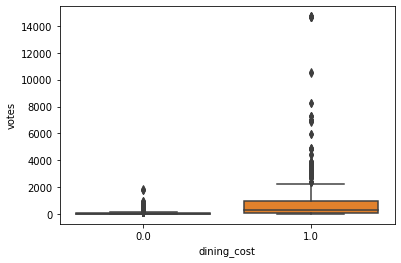

In [ ]:
# Look for outliers if any and see its distribution across the columns, along the columns.
# boxplot for votes
# Becasue votes is widely distrbuted, there are many outliers.
sns.boxplot(x='dining_cost', y ='votes', data=data) 

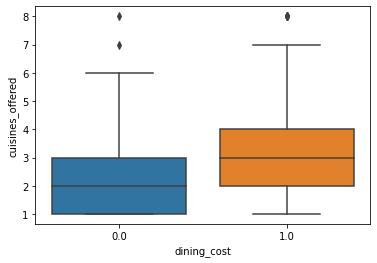

In [ ]:
# boxplot for cuisines_offered
# few outliers for cuisines_offered
sns.boxplot(x='dining_cost', y ='cuisines_offered', data=data)

In [ ]:
# What type of null you have (Categorical or Numerical).
# missing value
data.isnull().sum()

id                        0
name                      0
table_bookings            0
online_ordering           0
location                  0
rating                  351
votes                    44
phone                    34
restaurant_type         112
restaurant_operation     20
popular_dishes          119
cuisines_offered         22
primary_cuisine          17
dining_cost               0
dtype: int64

In [ ]:
# data type
# both categorical and numerical
data_has_null = data[['rating', 'votes', 'phone', 'restaurant_type','restaurant_operation','popular_dishes', 'cuisines_offered','primary_cuisine']]
data_has_null.dtypes

rating                   object
votes                   float64
phone                    object
restaurant_type          object
restaurant_operation     object
popular_dishes          float64
cuisines_offered        float64
primary_cuisine          object
dtype: object

In [ ]:
# Is there anything you need to be concerned of write your observation.

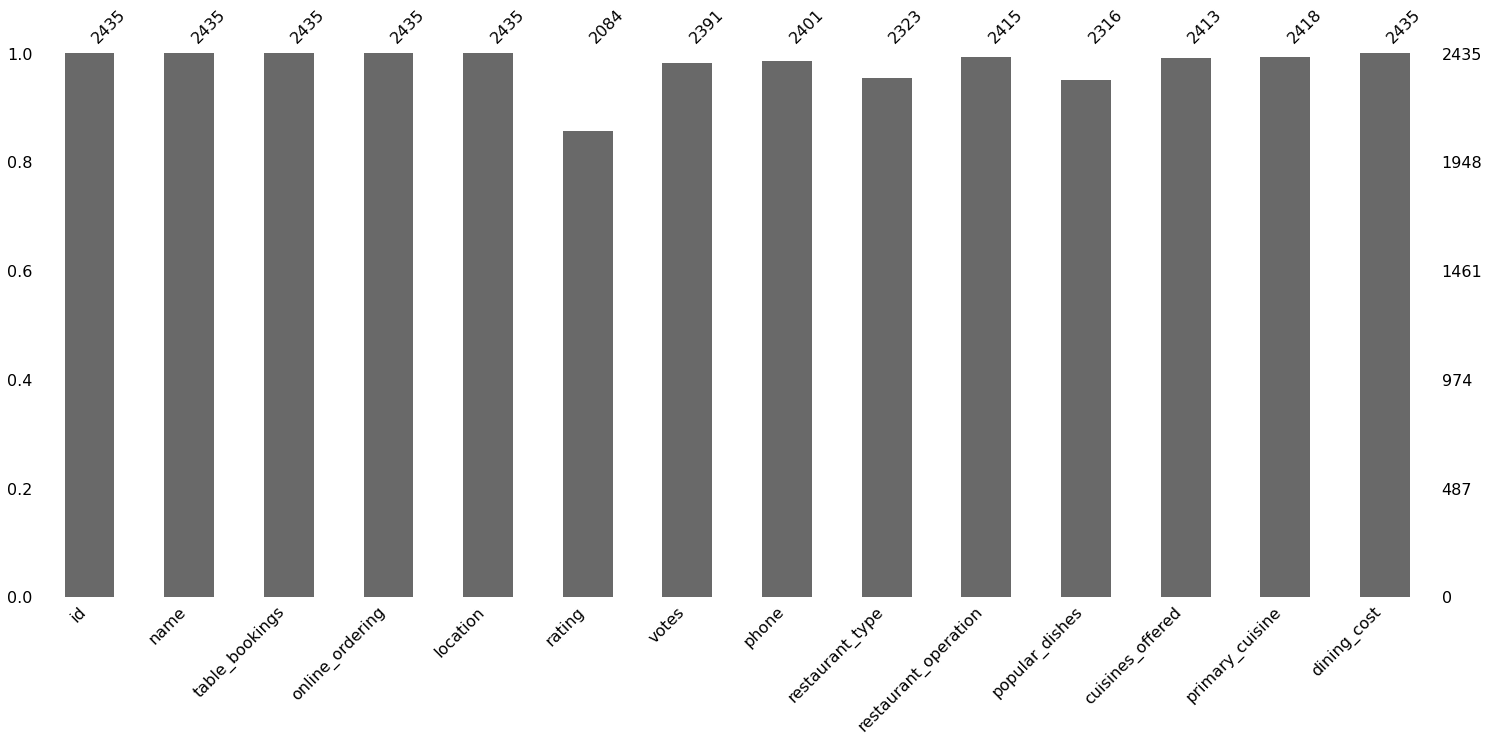

In [ ]:
### Hint: use the **mno** library when working with visualization for the NULL values.
#visualize the null value
import missingno as msno
msno.bar(data)

In [ ]:
## Fix the NULL VALUE ISSUE...!!!!!
# we choose to fix the null value by dropping the rows with any NaN
data = data.dropna(axis=0, how='any')


In [ ]:
data.isna().sum()

id                      0
name                    0
table_bookings          0
online_ordering         0
location                0
rating                  0
votes                   0
phone                   0
restaurant_type         0
restaurant_operation    0
popular_dishes          0
cuisines_offered        0
primary_cuisine         0
dining_cost             0
dtype: int64

In [ ]:
data.shape # After drop missing values, the data size is 1783 rows, 14 columns. 

(1783, 14)

## Visualization

Analyse the data, try to come up with some intereszting and Insightful visualization.

Come up with different analysis and what do you infer and observe from it:
- **Univariate Analysis of all the Variables**
- **Bi-variate analysis of atleast 3 pair of variables/features**
   1.   Categorical Vs Categorical
   2.   Categorical Vs Numerical
   3.   Numerical Vs Numerical
- **Multi-variate analysis**
- Plot some Pie-Chart as well.
- Some box-plots as well.

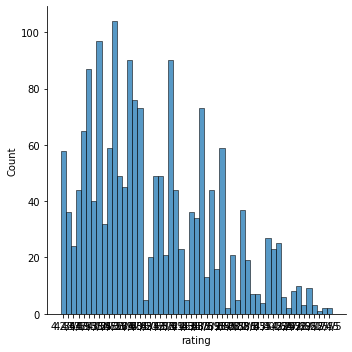

In [ ]:
### Perform your visualization

## Univariate Analysis of all the Variables：
# Quantitative variables

# rating
sns.displot(data.rating,bins=10,kde=False)
plt.show()

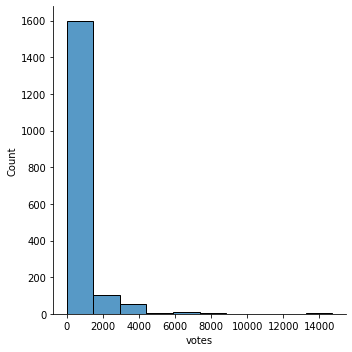

In [ ]:
# votes
sns.displot(data.votes,bins=10,kde=False)
plt.show()

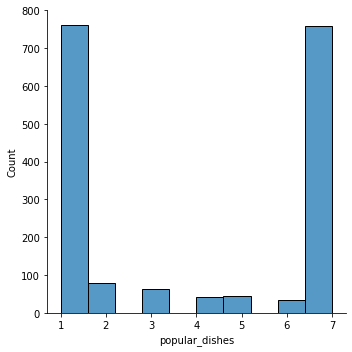

In [ ]:
# popular_dishes
sns.displot(data.popular_dishes,bins=10,kde=False)
plt.show()

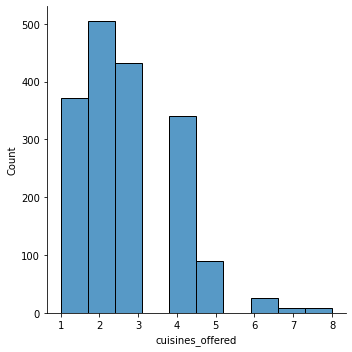

In [ ]:
# cuisines_offered
sns.displot(data.cuisines_offered,bins=10,kde=False)
plt.show()

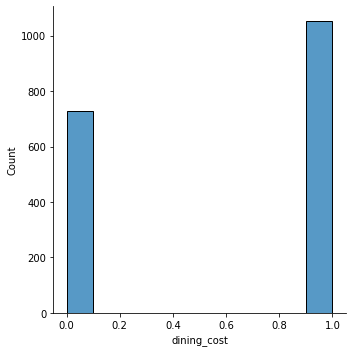

In [ ]:
# dining cost
sns.displot(data.dining_cost,bins=10,kde=False)
plt.show()

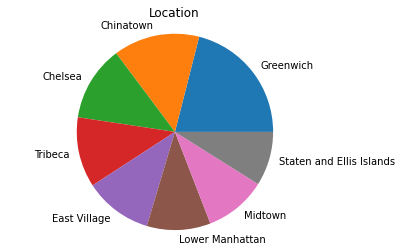

In [ ]:
# Categorical variables
# Location
location_labels=["Greenwich","Chinatown","Chelsea","Tribeca","East Village","Lower Manhattan","Midtown","Staten and Ellis Islands"]
plt.pie(data.location.value_counts(),labels=location_labels)
plt.title("Location"
plt.axis('equal')
plt.show()

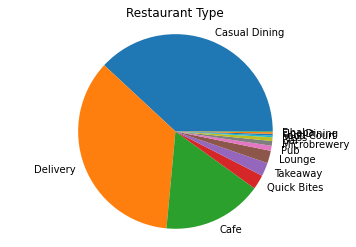

In [ ]:
# Restaurant Type
restaurant_type_labels=["Casual Dining","Delivery","Cafe","Quick Bites","Takeaway","Lounge","Pub","Microbrewery","Bar","Mess","Food Court","Fine Dining","Dhaba"]
plt.pie(data.restaurant_type.value_counts(),labels=restaurant_type_labels)
plt.title("Restaurant Type")
plt.axis('equal')
plt.show()

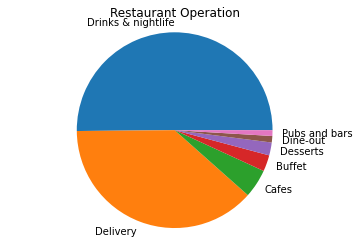

In [ ]:
# Restaurant Operation
restaurant_operation_lables=["Drinks & nightlife","Delivery","Cafes","Buffet","Desserts","Dine-out","Pubs and bars"]
plt.pie(data.restaurant_operation.value_counts(),labels=restaurant_operation_lables)
plt.title("Restaurant Operation")
plt.axis('equal')
plt.show()

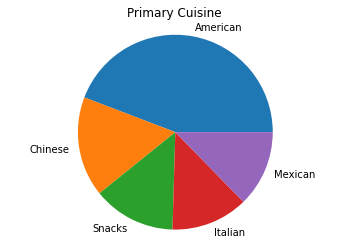

In [ ]:
# Primary Cuisine
primary_cuisine_labels=["American","Chinese","Snacks","Italian","Mexican"]
plt.pie(data.primary_cuisine.value_counts(),labels=primary_cuisine_labels)
plt.title("Primary Cuisine")
plt.axis('equal')
plt.show()

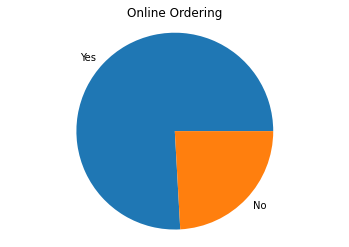

In [ ]:
# Online Ordering
online_ordering_labels=["Yes","No"]
plt.pie(data.online_ordering.value_counts(),labels=online_ordering_labels)
plt.title("Online Ordering")
plt.axis('equal')
plt.show()

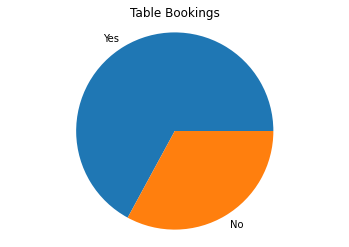

In [ ]:
# Table Bookings
table_bookings_labels=["Yes","No"]
plt.pie(data.table_bookings.value_counts(),labels=table_bookings_labels)
plt.title("Table Bookings")
plt.axis('equal')
plt.show()

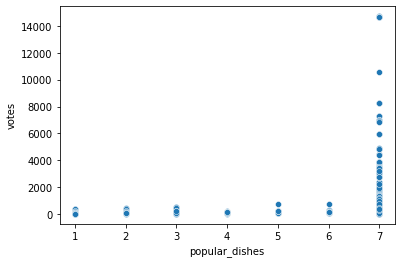

In [ ]:
## Bi-variate analysis
# Numerical VS Numerical: popluar_dishes VS votes
sns.scatterplot(data=data, x='popular_dishes', y='votes')
plt.show()
# the more popular dishes they have, the more votes they win

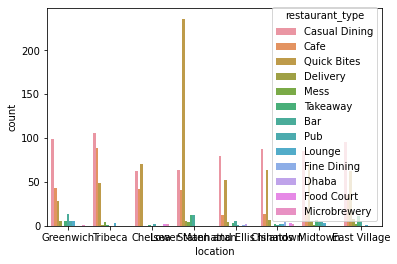

In [ ]:
# Categorical VS Categorical: location VS restaurant type
sns.countplot(x='location', hue='restaurant_type', data=data)
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


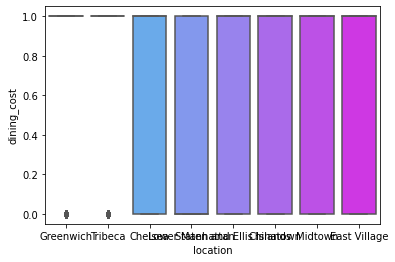

In [ ]:
# Categorical Vs Numerical: location & dining cost
sns.boxplot(data.location, data.dining_cost, data=data,palette='cool')
plt.show()

## Feature Engineering

1. **Know the most important features of the Data**
2. **Show the Visualization for the top features**
3. **Perform certain iterations for the no. of columns you going to work and see its model performance and look for the best number of features required to build a model**


In [ ]:
# Concatenate training and testing dataset for the next step's data wrangling
# Keep the data order the same
test = pd.read_csv('test.csv')
data_con = pd.concat([data.drop(['dining_cost'], axis=1), test])
data_con = data_con.drop(['id','name','phone'], axis=1)
data_con.shape

(2832, 10)

In [ ]:
# Add a new column/feature, which indicates whether a restaurant's rating is New
data_con.loc[data_con['rating'] == 'NEW', 'NEW'] = 1
data_con.loc[data_con['rating'] != 'NEW', 'NEW'] = 0
data_con.loc[data_con['rating'] == 'NEW', 'rating'] = '0'
data_con.loc[data_con['rating'] == '-', 'rating'] = '0'

# Convert 'rating' to numeric
data_con['rating'] = data_con['rating'].str.slice(0,3)
data_con['rating'] = data_con['rating'].astype(float)

# Convert other columns to numeric
yn_mapping = {"No": 0, "Yes": 1}
data_con['table_bookings'] = data_con['table_bookings'].map(yn_mapping)
data_con['online_ordering'] = data_con['online_ordering'].map(yn_mapping)

# Use OneHotEncoder to wrangle categorical data
cols = ['location','restaurant_type','restaurant_operation','primary_cuisine']
enc = OneHotEncoder()
enc.fit(data_con[cols])
column_name = enc.get_feature_names_out(cols)
data_hot_enc = pd.DataFrame(enc.transform(data_con[cols]).toarray(), index=data_con.index, columns=column_name)
data_con_enc = pd.concat([data_con,data_hot_enc], axis=1)
data_con_enc = data_con_enc.drop(cols, axis = 1)

# Use StandarScaler to standardize 'votes' feature by removing the mean and scaling to unit variance.
scale = StandardScaler()
data_con_enc['votes'] = scale.fit_transform(data_con_enc['votes'].array.reshape(-1,1))
data_con_enc.head(5)

,table_bookings,online_ordering,rating,votes,popular_dishes,cuisines_offered,NEW,location_Chelsea,location_Chinatown,location_East Village,...,restaurant_operation_Dine-out,restaurant_operation_Drinks & nightlife,restaurant_operation_Pubs and bars,restaurant_operation_nan,primary_cuisine_American,primary_cuisine_Chinese,primary_cuisine_Italian,primary_cuisine_Mexican,primary_cuisine_Snacks,primary_cuisine_nan
0,0,0,4.2,0.919199,7.0,4.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0,1,4.3,1.397690,7.0,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0,0,4.4,0.473570,7.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,0,3.4,-0.390439,1.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1,1,4.1,1.781605,7.0,3.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


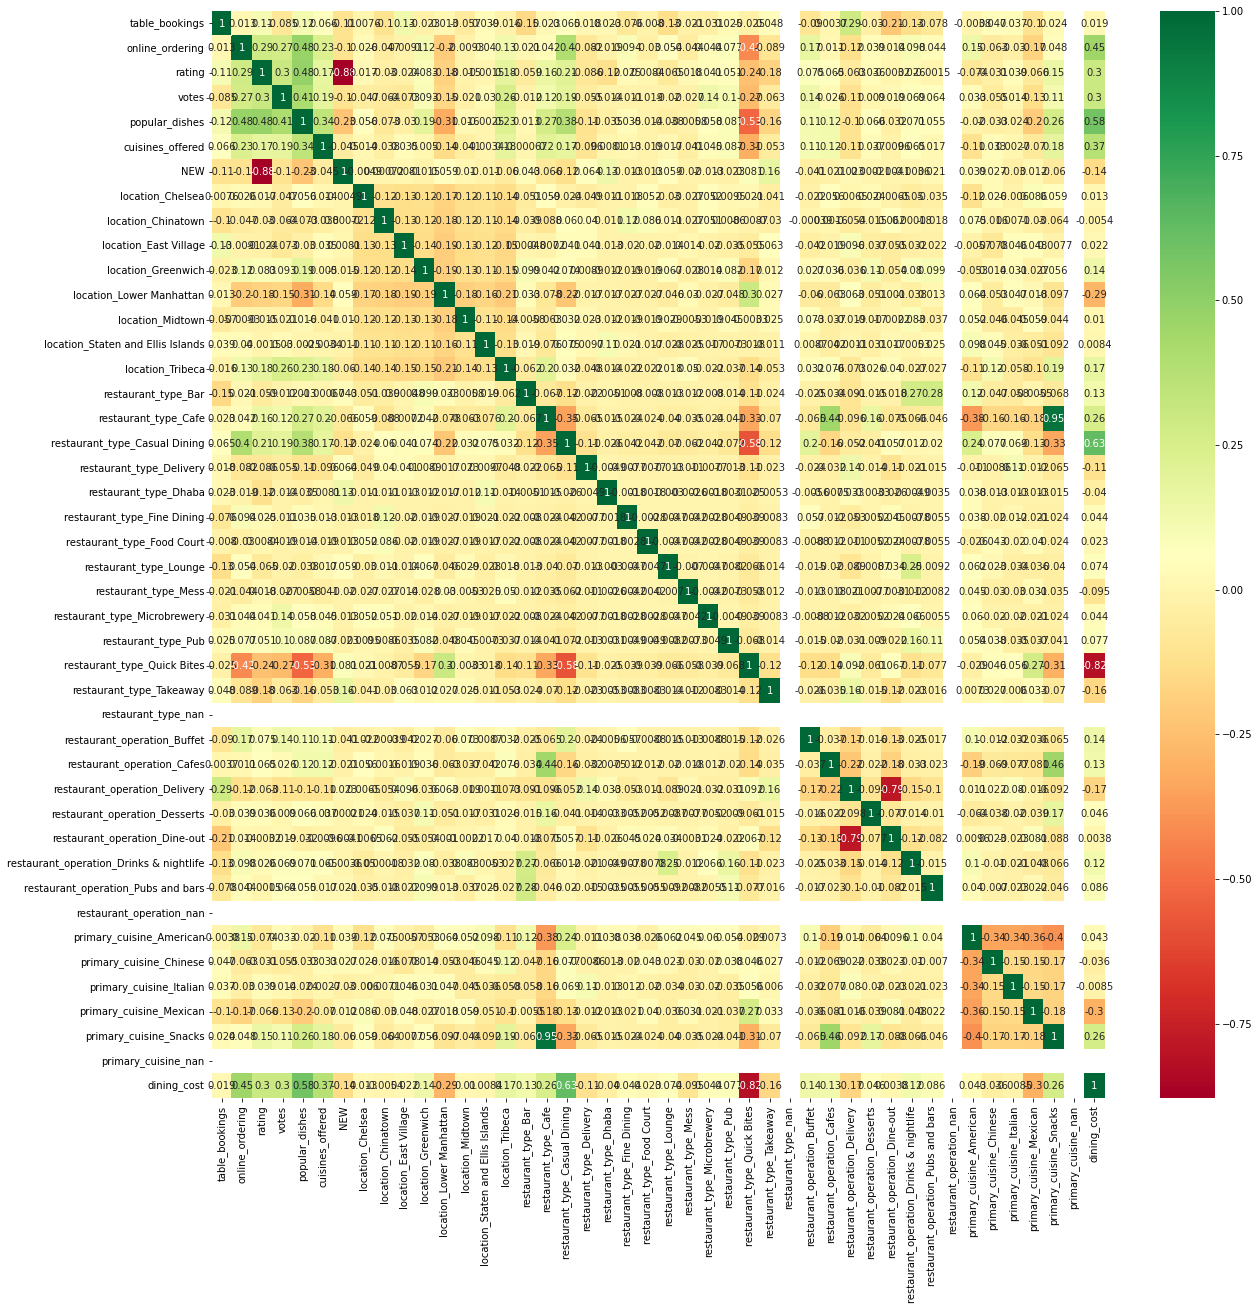

In [ ]:
#get correlations of each features in the processed dataset
train_set = pd.concat([data_con_enc[0:len(data)], data['dining_cost']], axis=1)
corrmat = train_set.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(train_set[top_corr_features].corr(),annot=True,cmap="RdYlGn")

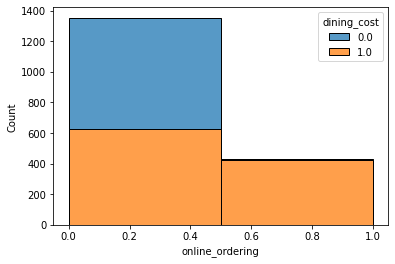

In [ ]:
# Now we know that there is a strong correlationthe between dining cost and 
# "online ordering", "popular dishes", 'casual dining' and 'quick bites'
# Here are the plots
fig, ax = plt.subplots()
sns.histplot(binwidth=0.5, hue="dining_cost", x="online_ordering", data=train_set, stat="count", multiple="stack", binrange=(0, 1))
plt.show()
# If the restaurant have online order service, it is expensive at most cases

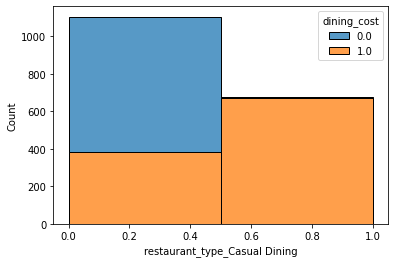

In [ ]:
fig, ax = plt.subplots()
sns.histplot(binwidth=0.5, hue="dining_cost", x="restaurant_type_Casual Dining", data=train_set, stat="count", multiple="stack", binrange=(0, 1))
plt.show()
# If the restaurant is casual dining, it is expensive at most cases

LR: 0.945975 (0.014436)
RF: 0.975141 (0.010397)
KNN: 0.946905 (0.017073)
DT: 0.974392 (0.010502)
AB: 0.946352 (0.010572)


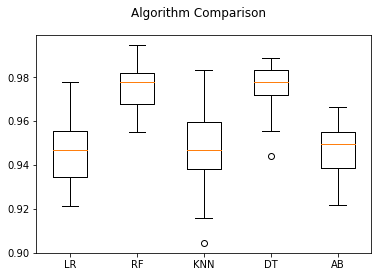

In [ ]:
# now we want to choose a model for next step's prediction
# We have several models as candidates
X = train_set.drop('dining_cost', axis=1)
y = train_set['dining_cost']

# prepare models
models = []
models.append(('LR', LogisticRegression(max_iter=1000)))
models.append(('RF', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('AB', AdaBoostClassifier()))

# evaluate each model in turn
# we will compare the cross validation scores of these models
# and decide which we will use
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
  cv_results = cross_val_score(model, X.values, y.values, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Modelling


Build a model that can categorizes restaurants into 'Budget' and 'Expensive' and identify how different features influence the decision. Please explain the findings effectively for technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [ ]:
# According to the comparision result, we choose Random Forest Classifier
# to classify test set
# Firstly we should train our model
# Here we divided the originial train dataset to a new train set and a set for 
# validation, so we can check if our model work properly
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, random_state=0)
rf = RandomForestClassifier(max_depth=4)
rf.fit(X_train.values, y_train.values)
print("Accuracy of train dataset：{:.3f}".format(rf.score(X_train.values, y_train.values)))
print("Accuracy of validation dataset：{:.3f}".format(rf.score(X_val.values, y_val.values)))

Accuracy of train dataset：0.945
Accuracy of validation dataset：0.953


In [ ]:
# Try to find the best parameters
rf = RandomForestClassifier()
parameters = {'n_estimators':[100,200,300], 'criterion':['gini', 'entropy'], 'max_depth':[4,8,16]}
grid = GridSearchCV(rf, parameters,cv=3)
grid.fit(X_train,y_train)
print("Best parameters combination: ",grid.best_params_)

model = grid.best_estimator_
model = model.fit(X_train,y_train)
print("Training set score: {:.3f}".format(model.score(X_train,y_train)))
print("Validation set score: {:.3f}".format(model.score(X_val,y_val)))

Best parameters combination:  {'criterion': 'gini', 'max_depth': 16, 'n_estimators': 100}
Training set score: 0.999
Validation set score: 0.978


### Submission task:
- **Submit the predictions on the test dataset using the optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `dining_cost` variable. Submit a CSV file with a header row and one row per test entry. 

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **dining_cost**

In [ ]:
# Use the best model to predict
test_set = data_con_enc[len(data)::].fillna(0)
predictions = model.predict(test_set)
print(predictions)

[1. 0. 1. ... 1. 1. 1.]


In [ ]:
submission_df = pd.DataFrame(test['id'])
submission_df['dining_cost'] = predictions
submission_df.head(5)

,id,dining_cost
0,19281,1.0
1,16095,0.0
2,42040,1.0
3,18753,1.0
4,21065,1.0


In [ ]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---